## Download the images


We can use **GoogleDriveDownloader** form **google_drive_downloader** library in Python to download the shared files from the shared Google drive link: https://drive.google.com/file/d/1f7uslI-ZHidriQFZR966_aILjlkgDN76/view?usp=sharing

The file id in the above link is: **1f7uslI-ZHidriQFZR966_aILjlkgDN76**

In [117]:
from google_drive_downloader import GoogleDriveDownloader as gdd

gdd.download_file_from_google_drive(file_id='1f7uslI-ZHidriQFZR966_aILjlkgDN76',
                                    dest_path='content/eye_gender_data.zip',
                                    unzip=True)

We have all the files from the shared Google drive link downloaded in the colab environment.

## Loading Libraries
All Python capabilities are not loaded to our working environment by default (even they are already installed in your system). So, we import each and every library that we want to use.

We chose alias names for our libraries for the sake of our convenience (numpy --> np and pandas --> pd, tensorlow --> tf).

Note: You can import all the libraries that you think will be required or can import it as you go along.

In [118]:
import matplotlib.pyplot as plt
import pandas as pd                                     # Data analysis and manipultion tool
import numpy as np                                      # Fundamental package for linear algebra and multidimensional arrays
import tensorflow as tf                                 # Deep Learning Tool                                              # OS module in Python provides a way of using operating system dependent functionality
import cv2                                              # Library for image processing
from sklearn.model_selection import train_test_split    # For splitting the data into train and validation set
from sklearn.metrics import f1_score
from tensorflow.keras import datasets, layers, models
from sklearn.metrics import accuracy_score

## Loading and preparing training data


In [119]:
labels = pd.read_csv("/content/content/eye_gender_data/Training_set.csv")   # loading the labels
file_paths = [[fname, '/content/content/eye_gender_data/train/' + fname] for fname in labels['filename']]
images = pd.DataFrame(file_paths, columns=['filename', 'filepaths'])
data = pd.merge(images, labels, how = 'inner', on = 'filename')

image_size = 100      # image size taken is 100 here. one can take other size too
X = np.array([cv2.resize(cv2.imread(data['filepaths'][i], cv2.IMREAD_GRAYSCALE),(image_size,image_size)).reshape(100,100,1) for i in range(len(images))])
Y = np.array([0.0 if (data['label'][i]) == 'male' else 1.0 for i in range(len(images))])

In [120]:
# train_data

1.0


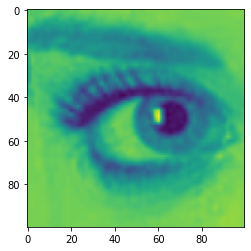

In [121]:
n=35
plt.imshow(X[n].reshape(100,100))
print(Y[n])

In [122]:
# train_data

In [123]:
labels = pd.read_csv("/content/content/eye_gender_data/Testing_set.csv")
file_paths = [[fname, '/content/content/eye_gender_data/test/' + fname] for fname in labels['filename']]
data = pd.DataFrame(file_paths, columns=['filename', 'filepaths'])

image_size = 100      # image size taken is 100 here. one can take other size too
test_X = np.array([cv2.resize(cv2.imread(data['filepaths'][i], cv2.IMREAD_GRAYSCALE),(image_size,image_size)).reshape(100,100,1) for i in range(len(data))])

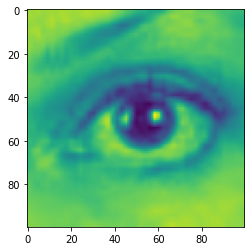

In [124]:
n=35
plt.imshow(test_X[n].reshape(100,100))

In [125]:
# test_data

In [126]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.1)

In [127]:
len(y_train),len(y_test)

(8298, 922)

In [128]:
%tensorflow_version 2.x
import tensorflow as tf
print("Tensorflow version " + tf.__version__)

try:
  tpu = tf.distribute.cluster_resolver.TPUClusterResolver()  # TPU detection
  print('Running on TPU ', tpu.cluster_spec().as_dict()['worker'])
except ValueError:
  raise BaseException('ERROR: Not connected to a TPU runtime; please see the previous cell in this notebook for instructions!')

tf.config.experimental_connect_to_cluster(tpu)
tf.tpu.experimental.initialize_tpu_system(tpu)
tpu_strategy = tf.distribute.experimental.TPUStrategy(tpu)

Tensorflow version 2.5.0
Running on TPU  ['10.47.32.202:8470']


INFO:tensorflow:Initializing the TPU system: grpc://10.47.32.202:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.47.32.202:8470


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


In [129]:
# from tensorflow.contrib.tpu.python.tpu import keras_support

def create_model():
  model = tf.keras.Sequential()

  # #add layers to the model 
  # model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1))) 
  # model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
  # model.add(tf.keras.layers.Dropout(0.3))

  # model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
  # model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
  # model.add(tf.keras.layers.Dropout(0.3))

  # model.add(tf.keras.layers.Flatten())
  # model.add(tf.keras.layers.Dense(256, activation='relu'))
  # model.add(tf.keras.layers.Dropout(0.5))
  # model.add(tf.keras.layers.Dense(10, activation='softmax'))

  model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(100,100,1)))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(64, (3, 3), activation='relu'))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(64, (3, 3), activation='relu'))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(64, (3, 3), activation='relu'))
  model.add(layers.MaxPooling2D((2, 2)))
  # model.add(layers.Conv2D(64, (3, 3), activation='relu'))
  # model.add(layers.MaxPooling2D((2, 2)))
  # model.add(layers.Conv2D(64, (3, 3), activation='relu'))

  model.add(layers.Flatten())
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dense(1,activation='sigmoid'))

  #compile the model 
  model.compile(loss='binary_crossentropy',
               optimizer='adam',
               metrics=['accuracy'])

  # #flag to run on tpu 
  # if tpu:
  #   tpu_grpc_url = "grpc://"+os.environ["COLAB_TPU_ADDR"]
    
  #   #connect the TPU cluster using the address 
  #   tpu_cluster_resolver = tf.contrib.cluster_resolver.TPUClusterResolver(tpu_grpc_url)
    
  #   #run the model on different clusters 
  #   strategy = keras_support.TPUDistributionStrategy(tpu_cluster_resolver)
    
  #   #convert the model to run on tpu 
  #   model = tf.contrib.tpu.keras_to_tpu_model(model, strategy=strategy)
  return model

In [130]:
with tpu_strategy.scope(): # creating the model in the TPUStrategy scope means we will train the model on the TPU
  model = create_model()
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_43 (Conv2D)           (None, 98, 98, 32)        320       
_________________________________________________________________
max_pooling2d_40 (MaxPooling (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_44 (Conv2D)           (None, 47, 47, 64)        18496     
_________________________________________________________________
max_pooling2d_41 (MaxPooling (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_45 (Conv2D)           (None, 21, 21, 64)        36928     
_________________________________________________________________
max_pooling2d_42 (MaxPooling (None, 10, 10, 64)        0         
_________________________________________________________________
conv2d_46 (Conv2D)           (None, 8, 8, 64)        

In [131]:
history = model.fit(X_train, y_train, epochs=10, 
                    validation_data=(X_test, y_test))


Epoch 1/10
260/260 [==============================] - 17s 46ms/step - loss: 0.6404 - accuracy: 0.7310 - val_loss: 0.3725 - val_accuracy: 0.8351
Epoch 2/10
260/260 [==============================] - 4s 17ms/step - loss: 0.3491 - accuracy: 0.8508 - val_loss: 0.3149 - val_accuracy: 0.8688
Epoch 3/10
260/260 [==============================] - 4s 16ms/step - loss: 0.2874 - accuracy: 0.8848 - val_loss: 0.3108 - val_accuracy: 0.8655
Epoch 4/10
260/260 [==============================] - 5s 18ms/step - loss: 0.2669 - accuracy: 0.8923 - val_loss: 0.3248 - val_accuracy: 0.8655
Epoch 5/10
260/260 [==============================] - 5s 18ms/step - loss: 0.2318 - accuracy: 0.9081 - val_loss: 0.2882 - val_accuracy: 0.8894
Epoch 6/10
260/260 [==============================] - 4s 16ms/step - loss: 0.2192 - accuracy: 0.9100 - val_loss: 0.2884 - val_accuracy: 0.8850
Epoch 7/10
260/260 [==============================] - 4s 16ms/step - loss: 0.1960 - accuracy: 0.9223 - val_loss: 0.2669 - val_accuracy: 0.905

In [135]:
preds = model.predict(X_test)
# preds = ['male' if preds[i] <=0.5 else 'female' for i in range(len(preds))]
preds = [0.0 if preds[i] <=0.5 else 1.0 for i in range(len(preds))]

0.0


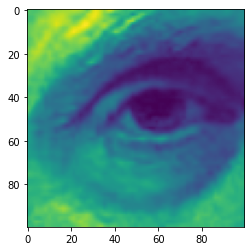

In [136]:
n=1
print(preds[n])
plt.imshow(X_test[n].reshape(100,100))

In [137]:
print("Accuracy="+str(accuracy_score(y_test,preds)))

Accuracy=0.9067245119305857


In [138]:
y_test[:10]

array([0., 0., 0., 1., 0., 1., 0., 1., 1., 1.])

In [139]:
preds[:10]

[0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0]

In [140]:
print('label')
final_preds=model.predict(test_X)
for i in range(len(final_preds)):
  ans= 'male' if final_preds[i] <=0.5 else 'female'
  print(ans)

label
male
female
male
male
male
male
female
male
male
female
female
female
female
male
male
female
male
female
male
female
male
female
female
female
female
female
male
female
male
male
male
male
male
female
male
female
female
female
male
female
male
male
female
female
male
male
female
female
female
male
male
male
male
male
female
male
male
female
female
male
male
female
male
female
female
female
female
female
female
male
male
female
female
female
female
male
male
male
female
female
female
female
male
male
male
male
female
male
female
male
female
male
male
male
male
female
male
female
male
male
female
male
male
male
male
male
female
male
male
male
male
male
female
male
female
female
male
male
male
male
male
male
female
male
male
male
male
female
male
male
male
male
female
female
male
male
female
female
male
male
male
male
male
female
male
male
male
male
female
female
female
female
male
male
male
male
female
male
male
male
male
male
male
female
male
male
female
female
male
female
male
m

In [ ]:
# res = pd.DataFrame({'filename': test_images['filename'], 'label': predictions})  # prediction is nothing but the final predictions of your model on input features of your new unseen test data
# res.to_csv("submission.csv", index = False)      # the csv file will be saved locally on the same location where this notebook is located.

# **OR,**
**If you are working on Google Colab then use the below set of code to save prediction results locally**

## **How to save prediction results locally via colab notebook?**
If you are working on Google Colab Notebook, execute below block of codes. A file named 'prediction_results' will be downloaded in your system.

In [ ]:
# res = pd.DataFrame({'filename': test_images['filename'], 'label': predictions})  # prediction is nothing but the final predictions of your model on input features of your new unseen test data
# res.to_csv("submission.csv", index = False) 

# # To download the csv file locally
# from google.colab import files        
# files.download('submission.csv')

# **Well Done! 👍**
You are all set to make a submission. Let's head to the **[challenge page](https://dphi.tech/challenges/4-week-deep-learning-online-bootcamp-final-assignment-sex-determination-by-morphometry-of-eyes/144/submit)** to make the submission.